## Install Packages

In [1]:
# Install GDAL and Geopandas
#!pip install gdal-bin python-gdal python3-gdal --quiet
#!pip install python3-rtree --quiet
#!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install geopy plotly_express ipython-autotime descartes --quiet

In [2]:
#pip list

## Import Packages

In [3]:
import xlrd
import pandas as pd
from shapely.geometry import Point, LineString, Polygon
import geopandas as gpd
from geopandas.tools import geocode, geocoding, reverse_geocode
import geopy, inspect
print(geopy.__version__)

from tqdm import tqdm
import urllib.request
import json
from shapely.geometry import shape, Point
import time

time_start = time.time()
tqdm.pandas()

2.2.0


## API KAWASANKU (Reverse Geocode to District, DUN, Parliment)

In [4]:
PATH_GEOJSON = 'https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/geodata/'

geojsons = ['administrative_0_malaysia',
            'administrative_1_state',
            'administrative_2_district',
            'electoral_0_parlimen',
            'electoral_1_dun']

for i in range (len(geojsons)): geojsons[i] = PATH_GEOJSON + geojsons[i] + '.geojson'

states = json.load(urllib.request.urlopen(geojsons[1]))
districts = json.load(urllib.request.urlopen(geojsons[2]))
parlimens = json.load(urllib.request.urlopen(geojsons[3]))
duns = json.load(urllib.request.urlopen(geojsons[4]))
int_jsonfile = {1: states, 2: districts, 3: parlimens, 4: duns}

def reverse_geocode(lon,lat,geojson_file,name_field):
    try: point = Point(lon, lat)
    except Exception as e:
        print(e)
        return 'Error'

    for feature in geojson_file['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point): return (feature['properties'])[name_field].title()

    return 'OUT_OF_BOUNDS'

In [10]:
!pip install pandas_geojson -qq

In [15]:
from pandas_geojson import read_geojson, filter_geojson
filter = ['Pulau Pinang']
geojson = read_geojson('electoral_1_dun (2).geojson')
duns = filter_geojson(geo_json=geojson, filter_list=filter, property_key='state')
#print(duns)

In [5]:
import geopandas as gpd
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [6]:
duns = gpd.read_file("https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/geodata/electoral_1_dun.geojson")

In [7]:
dunspp = duns[duns['state']== 'Pulau Pinang']

In [8]:
dunspp.head()

,state,parlimen,dun,code_state,code_parlimen,code_dun,code_state_dun,geometry
243,Pulau Pinang,P.041 Kepala Batas,N.01 Penaga,7,P.041,N.01,7_N.01,"MULTIPOLYGON (((100.37777 5.57968, 100.37970 5..."
244,Pulau Pinang,P.041 Kepala Batas,N.02 Bertam,7,P.041,N.02,7_N.02,"MULTIPOLYGON (((100.40425 5.53774, 100.40576 5..."
245,Pulau Pinang,P.041 Kepala Batas,N.03 Pinang Tunggal,7,P.041,N.03,7_N.03,"MULTIPOLYGON (((100.49165 5.56651, 100.50514 5..."
246,Pulau Pinang,P.042 Tasek Gelugor,N.04 Permatang Berangan,7,P.042,N.04,7_N.04,"MULTIPOLYGON (((100.49829 5.50595, 100.50364 5..."
247,Pulau Pinang,P.042 Tasek Gelugor,N.05 Sungai Dua,7,P.042,N.05,7_N.05,"MULTIPOLYGON (((100.41652 5.50560, 100.42695 5..."


In [ ]:
from shapely.geometry import MultiPoint

In [ ]:
dunspp = gpd.GeoDataFrame(dunspp, crs=4326)

In [17]:
dunspp = duns

In [18]:
dunspp.info()

AttributeError: 'str' object has no attribute 'info'

In [19]:
dunspp.plot(figsize=(6, 6))
plt.show()

AttributeError: 'str' object has no attribute 'plot'

## Kawasan Hotspot Banjir di Pulau Pinang

In [20]:
hspot = pd.read_excel("kawasan-hotspot-banjir-mengikut-daerah-di-pulau-pinang-2020-ppsn-17022020.xlsx", skiprows=2)
#hspot.tail(5)

In [21]:
#geocode(strings='Kg. Sanglang, SEBERANG PERAI SELATAN', provider='arcgis')

In [22]:
hspot['kwsn_hot'] = hspot['KAWASAN HOTSPOT BANJIR'] + "," + hspot['DAERAH']
#hspot.head()

### Geocoding lokasi hotspot banjir

In [ ]:
gkwsn_hot = geocode(strings=hspot['kwsn_hot'], provider='arcgis')
#gkwsn_hot.head()

In [23]:
gkwsn_hot = pd.read_csv("gkwsn_hot.csv", usecols=["geometry", "address"])
gkwsn_hot.head()

,geometry,address
0,POINT (100.32277 5.409320000000037),"Kampung Makam, George Town, Timur Laut, Pulau ..."
1,POINT (100.3140300000001 5.404410000000041),"Kampung Dodol, George Town, Timur Laut, Pulau ..."
2,POINT (100.31539 5.406510000000026),Masjid Jamek Hashim Yahaya
3,POINT (100.3140734163665 5.409581694947581),"Jalan P. Ramlee, Taman Seri Kijang, George Tow..."
4,POINT (100.3147515070017 5.410768050340871),"Lilitan Stadium, George Town, Timur Laut, 1035..."


In [24]:
frames = [gkwsn_hot, hspot['KAWASAN HOTSPOT BANJIR']]

gkwsn_hot = pd.concat(frames, axis=1)
gkwsn_hot

,geometry,address,KAWASAN HOTSPOT BANJIR
0,POINT (100.32277 5.409320000000037),"Kampung Makam, George Town, Timur Laut, Pulau ...",Kampung Makam Haji Kassim
1,POINT (100.3140300000001 5.404410000000041),"Kampung Dodol, George Town, Timur Laut, Pulau ...",Kampung Dodol
2,POINT (100.31539 5.406510000000026),Masjid Jamek Hashim Yahaya,Kampung Masjid Hashim Yahya
3,POINT (100.3140734163665 5.409581694947581),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...",Jalan P.Ramlee
4,POINT (100.3147515070017 5.410768050340871),"Lilitan Stadium, George Town, Timur Laut, 1035...",Lilitan Stadium (Astaka Makan)
...,...,...,...
306,POINT (100.4814900000001 5.165760000000034),"Kampung Sanglang, Nibong Tebal, Seberang Perai...",Kg. Sanglang
307,POINT (100.48204 5.168700000000058),"Taman Veerapen, Nibong Tebal, Seberang Perai S...",Taman Veerapen
308,POINT (100.4830700000001 5.172030000000063),"Taman Penting, Nibong Tebal, Seberang Perai Se...",Taman Penting
309,POINT (100.4838300000001 5.167210000000068),"Taman Permai, Nibong Tebal, Seberang Perai Sel...",Taman Permai


In [25]:
point = gkwsn_hot

In [26]:
point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   geometry                311 non-null    object
 1   address                 311 non-null    object
 2   KAWASAN HOTSPOT BANJIR  311 non-null    object
dtypes: object(3)
memory usage: 7.4+ KB


In [27]:
from shapely import wkt
#df = pd.read_csv('myFile.csv')
point['geometry'] = point['geometry'].apply(wkt.loads)
point = gpd.GeoDataFrame(point, crs='epsg:4326')
#gdf

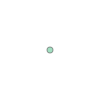

In [28]:
point.geometry[0]

In [29]:
#point.info()

In [30]:
point['coords'] = point.geometry.apply(lambda p: list(p.coords))

In [31]:
point['coords'] = point['coords'].apply(lambda x: pd.Series(str(x).replace('[','').replace(']','').replace('(','').replace(')','')))

In [32]:
point[['lon','lat']] = point['coords'].apply(lambda x: pd.Series(str(x).split(",")))

In [33]:
point.head()

,geometry,address,KAWASAN HOTSPOT BANJIR,coords,lon,lat
0,POINT (100.32277 5.40932),"Kampung Makam, George Town, Timur Laut, Pulau ...",Kampung Makam Haji Kassim,"100.32277, 5.409320000000037",100.32277,5.409320000000037
1,POINT (100.31403 5.40441),"Kampung Dodol, George Town, Timur Laut, Pulau ...",Kampung Dodol,"100.3140300000001, 5.404410000000041",100.3140300000001,5.404410000000041
2,POINT (100.31539 5.40651),Masjid Jamek Hashim Yahaya,Kampung Masjid Hashim Yahya,"100.31539, 5.406510000000026",100.31539,5.406510000000026
3,POINT (100.31407 5.40958),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...",Jalan P.Ramlee,"100.3140734163665, 5.409581694947581",100.3140734163665,5.409581694947581
4,POINT (100.31475 5.41077),"Lilitan Stadium, George Town, Timur Laut, 1035...",Lilitan Stadium (Astaka Makan),"100.3147515070017, 5.410768050340871",100.3147515070017,5.410768050340871


In [34]:
point.columns

Index(['geometry', 'address', 'KAWASAN HOTSPOT BANJIR', 'coords', 'lon',
       'lat'],
      dtype='object')

In [35]:
point.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   geometry                311 non-null    geometry
 1   address                 311 non-null    object  
 2   KAWASAN HOTSPOT BANJIR  311 non-null    object  
 3   coords                  311 non-null    object  
 4   lon                     311 non-null    object  
 5   lat                     311 non-null    object  
dtypes: geometry(1), object(5)
memory usage: 14.7+ KB


In [36]:
# convert just columns "a" and "b"
point[['lon','lat']] = point[['lon','lat']].apply(pd.to_numeric)

In [37]:
df = pd.DataFrame(point,columns=['geometry', 'address', 'KAWASAN HOTSPOT BANJIR', 'coords', 'lon',
       'lat'])
df.head()

,geometry,address,KAWASAN HOTSPOT BANJIR,coords,lon,lat
0,POINT (100.32277 5.40932),"Kampung Makam, George Town, Timur Laut, Pulau ...",Kampung Makam Haji Kassim,"100.32277, 5.409320000000037",100.322770,5.409320
1,POINT (100.31403 5.40441),"Kampung Dodol, George Town, Timur Laut, Pulau ...",Kampung Dodol,"100.3140300000001, 5.404410000000041",100.314030,5.404410
2,POINT (100.31539 5.40651),Masjid Jamek Hashim Yahaya,Kampung Masjid Hashim Yahya,"100.31539, 5.406510000000026",100.315390,5.406510
3,POINT (100.31407 5.40958),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...",Jalan P.Ramlee,"100.3140734163665, 5.409581694947581",100.314073,5.409582
4,POINT (100.31475 5.41077),"Lilitan Stadium, George Town, Timur Laut, 1035...",Lilitan Stadium (Astaka Makan),"100.3147515070017, 5.410768050340871",100.314752,5.410768


### Apply API KAWASANKU - lokasi hotspot banjir

In [38]:
levels = ['country','state','district','parlimen','dun']
for i in [1,2,3,4]: 
    df[levels[i]] = df.progress_apply(lambda x: reverse_geocode(x['lon'], x['lat'], int_jsonfile[i], levels[i]), axis = 1)
df.head()

100%|████████████████████████████████████████████████████████████████████████████████| 311/311 [00:03<00:00, 98.82it/s]


,geometry,address,KAWASAN HOTSPOT BANJIR,coords,lon,lat,state,district,parlimen,dun
0,POINT (100.32277 5.40932),"Kampung Makam, George Town, Timur Laut, Pulau ...",Kampung Makam Haji Kassim,"100.32277, 5.409320000000037",100.322770,5.409320,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat
1,POINT (100.31403 5.40441),"Kampung Dodol, George Town, Timur Laut, Pulau ...",Kampung Dodol,"100.3140300000001, 5.404410000000041",100.314030,5.404410,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat
2,POINT (100.31539 5.40651),Masjid Jamek Hashim Yahaya,Kampung Masjid Hashim Yahya,"100.31539, 5.406510000000026",100.315390,5.406510,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat
3,POINT (100.31407 5.40958),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...",Jalan P.Ramlee,"100.3140734163665, 5.409581694947581",100.314073,5.409582,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat
4,POINT (100.31475 5.41077),"Lilitan Stadium, George Town, Timur Laut, 1035...",Lilitan Stadium (Astaka Makan),"100.3147515070017, 5.410768050340871",100.314752,5.410768,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat


In [39]:
hotspot = df
hotspot.head()

,geometry,address,KAWASAN HOTSPOT BANJIR,coords,lon,lat,state,district,parlimen,dun
0,POINT (100.32277 5.40932),"Kampung Makam, George Town, Timur Laut, Pulau ...",Kampung Makam Haji Kassim,"100.32277, 5.409320000000037",100.322770,5.409320,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat
1,POINT (100.31403 5.40441),"Kampung Dodol, George Town, Timur Laut, Pulau ...",Kampung Dodol,"100.3140300000001, 5.404410000000041",100.314030,5.404410,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat
2,POINT (100.31539 5.40651),Masjid Jamek Hashim Yahaya,Kampung Masjid Hashim Yahya,"100.31539, 5.406510000000026",100.315390,5.406510,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat
3,POINT (100.31407 5.40958),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...",Jalan P.Ramlee,"100.3140734163665, 5.409581694947581",100.314073,5.409582,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat
4,POINT (100.31475 5.41077),"Lilitan Stadium, George Town, Timur Laut, 1035...",Lilitan Stadium (Astaka Makan),"100.3147515070017, 5.410768050340871",100.314752,5.410768,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat


### Label lokasi hotspot banjir

In [40]:
hotspot['label'] = 'hotspot'
hotspot.head()

,geometry,address,KAWASAN HOTSPOT BANJIR,coords,lon,lat,state,district,parlimen,dun,label
0,POINT (100.32277 5.40932),"Kampung Makam, George Town, Timur Laut, Pulau ...",Kampung Makam Haji Kassim,"100.32277, 5.409320000000037",100.322770,5.409320,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
1,POINT (100.31403 5.40441),"Kampung Dodol, George Town, Timur Laut, Pulau ...",Kampung Dodol,"100.3140300000001, 5.404410000000041",100.314030,5.404410,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
2,POINT (100.31539 5.40651),Masjid Jamek Hashim Yahaya,Kampung Masjid Hashim Yahya,"100.31539, 5.406510000000026",100.315390,5.406510,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
3,POINT (100.31407 5.40958),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...",Jalan P.Ramlee,"100.3140734163665, 5.409581694947581",100.314073,5.409582,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
4,POINT (100.31475 5.41077),"Lilitan Stadium, George Town, Timur Laut, 1035...",Lilitan Stadium (Astaka Makan),"100.3147515070017, 5.410768050340871",100.314752,5.410768,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot


In [ ]:
hotspot.to_csv("gkwsn_hot_kawasanku.csv")

## Kawasan Banjir di Pulau Pinang

In [41]:
ppmb = pd.read_excel("senarai-kawasan-banjir-3001_16072018.xlsx", skiprows=3)
ppmb

,Daerah,Lembangan Sungai,Nama Tempat/Jalan,Punca Banjir,Unnamed: 4
0,Daerah Timur Laut,SG. PINANG,Jalan Langkawi,Hujan dikawasan tadahan dan air pasang tinggi,NaN
1,Daerah Timur Laut,SG. PINANG,Lorong Kulit,Hujan dikawasan tadahan dan air pasang tinggi,NaN
2,Daerah Timur Laut,SG. PINANG,Kg. Rawang,Kawasan kampung/ jalan rendah,NaN
3,Daerah Timur Laut,SG. PINANG,Belakang Sek. Men. Abdullah Munshi,Kawasan kampung/ jalan rendah,NaN
4,Daerah Timur Laut,SG. PINANG,Kg. Jln. Syeikh Madar,Kawasan kampung/ jalan rendah,NaN
...,...,...,...,...,...
115,Daerah Seberang Perai Selatan,SG. JAWI,"Kg. Sithu, Setor JKR S.P.S, Jln. Changkat,",Hujan dikawasan tadahan dan kawasan hulu sunga...,NaN
116,Daerah Seberang Perai Selatan,SG. JAWI,Taman Jawi Jaya,Hujan dikawasan tadahan dan kawasan hulu sunga...,NaN
117,Daerah Seberang Perai Selatan,SG. JAWI,"Pusat Giat Mara, Taman Sg. Bakap Indah,",Hujan dikawasan tadahan dan kawasan hulu sunga...,NaN
118,Daerah Seberang Perai Selatan,SG. JAWI,Rumah Murah Sungai Bakap,Hujan dikawasan tadahan dan kawasan hulu sunga...,NaN


In [42]:
ppmb['kwsn_ppmb'] = ppmb['Nama Tempat/Jalan'] + ", " + ppmb['Daerah']
ppmb.head()

,Daerah,Lembangan Sungai,Nama Tempat/Jalan,Punca Banjir,Unnamed: 4,kwsn_ppmb
0,Daerah Timur Laut,SG. PINANG,Jalan Langkawi,Hujan dikawasan tadahan dan air pasang tinggi,NaN,"Jalan Langkawi, Daerah Timur Laut"
1,Daerah Timur Laut,SG. PINANG,Lorong Kulit,Hujan dikawasan tadahan dan air pasang tinggi,NaN,"Lorong Kulit, Daerah Timur Laut"
2,Daerah Timur Laut,SG. PINANG,Kg. Rawang,Kawasan kampung/ jalan rendah,NaN,"Kg. Rawang, Daerah Timur Laut"
3,Daerah Timur Laut,SG. PINANG,Belakang Sek. Men. Abdullah Munshi,Kawasan kampung/ jalan rendah,NaN,"Belakang Sek. Men. Abdullah Munshi, Daerah Tim..."
4,Daerah Timur Laut,SG. PINANG,Kg. Jln. Syeikh Madar,Kawasan kampung/ jalan rendah,NaN,"Kg. Jln. Syeikh Madar, Daerah Timur Laut"


In [43]:
g_ppmb = geocode(strings=ppmb['kwsn_ppmb'], provider='arcgis')
g_ppmb.head()

KeyboardInterrupt: 

In [44]:
len(g_ppmb)

NameError: name 'g_ppmb' is not defined

In [45]:
frames = [ppmb, g_ppmb]

g_ppmb2 = pd.concat(frames, axis=1)
g_ppmb2.head()

NameError: name 'g_ppmb' is not defined

In [ ]:
g_ppmb2.to_csv("g_ppmb.csv")

### Geocoding lokasi kawasan banjir

In [ ]:
g_ppmbuq = pd.read_csv("g_ppmb.csv", usecols=['geometry', 'address', 'kwsn_ppmb']) #raw data not in geopandas format
#gkwsn_hot.head()

point = g_ppmbuq

from shapely import wkt
#df = pd.read_csv('myFile.csv')
point['geometry'] = point['geometry'].apply(wkt.loads)
point = gpd.GeoDataFrame(point, crs='epsg:4326')

In [ ]:
len(point)

In [ ]:
#Point to coordinate
point['coords'] = point.geometry.apply(lambda p: list(p.coords))
point['coords'] = point['coords'].apply(lambda x: pd.Series(str(x).replace('[','').replace(']','').replace('(','').replace(')','')))
point[['lon','lat']] = point['coords'].apply(lambda x: pd.Series(str(x).split(",")))

# convert just columns 'lon','lat'
point[['lon','lat']] = point[['lon','lat']].apply(pd.to_numeric)

#make dataframe
df = pd.DataFrame(point,columns=['geometry', 'address', 'kwsn_ppmb', 'coords', 'lon',
       'lat'])
#df.head()

#reverse geocode to #KAWASANKU API - District, DUN, Par
levels = ['country','state','district','parlimen','dun']
for i in [1,2,3,4]: 
    df[levels[i]] = df.progress_apply(lambda x: reverse_geocode(x['lon'], x['lat'], int_jsonfile[i], levels[i]), axis = 1)
df.head()

In [ ]:
df = df.drop_duplicates(subset='address', keep="first")
df.shape

In [ ]:
#out of 120 data, only 94 left due to duplicated address/geocode

In [ ]:
g_ppmbuq = df

### Label lokasi kawasan banjir

In [ ]:
g_ppmbuq['label'] = 'kawasan banjir'
g_ppmbuq.head()

In [ ]:
g_ppmbuq.to_csv("g_ppmbuq_kawasanku.csv")

## Pusat Pemindahan Semasa Bencana di Pulau Pinang

In [ ]:
ppsb = pd.read_excel("2018 - Pusat Pemindahan Semasa Bencana Pulau Pinan.xlsx")

In [ ]:
ppsb['Nama  Pusat Pemindahan'] = ppsb['Nama  Pusat Pemindahan'].apply(lambda x: pd.Series(str(x).replace('_x000D_','').replace('\n','')))
ppsb['Alamat'] = ppsb['Alamat'].apply(lambda x: pd.Series(str(x).replace('_x000D_','').replace('\n','')))
ppsb['Kawasan'] = ppsb['Kawasan'].apply(lambda x: pd.Series(str(x).replace('_x000D_','').replace('\n','')))

In [ ]:
ppsb.columns

In [ ]:
ppsb['Lokasi'] = ppsb['Nama  Pusat Pemindahan'] + ", " + ppsb['Kawasan']

In [ ]:
ppsb.head()

In [ ]:
g_ppsb = geocode(strings=ppsb['Alamat'], provider='arcgis')

In [ ]:
g_ppsb.to_csv("gppsb.csv")

In [ ]:
frames = [ppsb['Lokasi'], g_ppsb]

g_ppsb = pd.concat(frames, axis=1)
g_ppsb.head()

In [ ]:
g_ppsb.to_csv("gppsb.csv")

In [ ]:
g_ppsb = pd.read_csv("gppsb.csv")
g_ppsb.head()

In [ ]:
g_ppsb.columns

In [ ]:
ppsb = pd.read_csv("gppsb.csv", usecols=["geometry", "address", "Lokasi"]) #raw data not in geopandas format
ppsb.head()

In [ ]:
point = ppsb

from shapely import wkt
#df = pd.read_csv('myFile.csv')
point['geometry'] = point['geometry'].apply(wkt.loads)
point = gpd.GeoDataFrame(point, crs='epsg:4326')

#Point to coordinate
point['coords'] = point.geometry.apply(lambda p: list(p.coords))
point['coords'] = point['coords'].apply(lambda x: pd.Series(str(x).replace('[','').replace(']','').replace('(','').replace(')','')))
point[['lon','lat']] = point['coords'].apply(lambda x: pd.Series(str(x).split(",")))

# convert just columns 'lon','lat'
point[['lon','lat']] = point[['lon','lat']].apply(pd.to_numeric)

In [ ]:
#make dataframe
df = pd.DataFrame(point,columns=['geometry', 'address','Lokasi','coords', 'lon',
       'lat'])
df.head()



In [ ]:
#reverse geocode to #KAWASANKU API - District, DUN, Par
levels = ['country','state','district','parlimen','dun']
for i in [1,2,3,4]: 
    df[levels[i]] = df.progress_apply(lambda x: reverse_geocode(x['lon'], x['lat'], int_jsonfile[i], levels[i]), axis = 1)
df.head()

In [ ]:
df['label'] = 'pusat pemindahan bencana'

In [ ]:
df.to_csv("g_ppsb_kawasanku.csv")

In [ ]:
df.head()

==================================
## Combine data hotspot/kwsan banjir/Pusat Pemindahan Semasa Bencana

In [46]:
hotspot = pd.read_csv("gkwsn_hot_kawasanku.csv")
kawasan = pd.read_csv("g_ppmbuq_kawasanku.csv")
pusat = pd.read_csv("g_ppsb_kawasanku.csv")

In [47]:
hotspot.columns

Index(['Unnamed: 0', 'geometry', 'address', 'KAWASAN HOTSPOT BANJIR', 'coords',
       'lon', 'lat', 'state', 'district', 'parlimen', 'dun', 'label'],
      dtype='object')

In [48]:
hotspot.columns = ['Unnamed: 0', 'geometry', 'address', 'lokasi', 'coords','lon', 'lat', 'state', 'district', 'parlimen', 'dun', 'label']
hotspot.head()

,Unnamed: 0,geometry,address,lokasi,coords,lon,lat,state,district,parlimen,dun,label
0,0,POINT (100.32277 5.409320000000037),"Kampung Makam, George Town, Timur Laut, Pulau ...",Kampung Makam Haji Kassim,"100.32277, 5.409320000000037",100.322770,5.409320,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
1,1,POINT (100.3140300000001 5.404410000000041),"Kampung Dodol, George Town, Timur Laut, Pulau ...",Kampung Dodol,"100.3140300000001, 5.404410000000041",100.314030,5.404410,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
2,2,POINT (100.31539 5.406510000000026),Masjid Jamek Hashim Yahaya,Kampung Masjid Hashim Yahya,"100.31539, 5.406510000000026",100.315390,5.406510,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
3,3,POINT (100.3140734163665 5.409581694947581),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...",Jalan P.Ramlee,"100.3140734163665, 5.409581694947581",100.314073,5.409582,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
4,4,POINT (100.3147515070017 5.410768050340871),"Lilitan Stadium, George Town, Timur Laut, 1035...",Lilitan Stadium (Astaka Makan),"100.3147515070017, 5.410768050340871",100.314752,5.410768,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot


In [49]:
kawasan.columns

Index(['Unnamed: 0', 'geometry', 'address', 'kwsn_ppmb', 'coords', 'lon',
       'lat', 'state', 'district', 'parlimen', 'dun', 'label'],
      dtype='object')

In [50]:
kawasan.columns = ['Unnamed: 0', 'geometry', 'address', 'lokasi', 'coords', 'lon',
       'lat', 'state', 'district', 'parlimen', 'dun', 'label']
kawasan.head()

,Unnamed: 0,geometry,address,lokasi,coords,lon,lat,state,district,parlimen,dun,label
0,0,POINT (100.3102969207417 5.410886632235363),"Jalan Langkawi, Taman Rampas, George Town, Tim...","Jalan Langkawi, Daerah Timur Laut","100.3102969207417, 5.410886632235363",100.310297,5.410887,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,kawasan banjir
1,1,POINT (100.3131674194301 5.412475710169735),"Lorong Kulit, George Town, Timur Laut, 10350, ...","Lorong Kulit, Daerah Timur Laut","100.3131674194301, 5.412475710169735",100.313167,5.412476,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,kawasan banjir
2,2,POINT (100.2921800000001 5.404120000000034),"Daerah Timur Laut, Pulau Pinang","Kg. Rawang, Daerah Timur Laut","100.2921800000001, 5.404120000000034",100.292180,5.404120,Pulau Pinang,Timur Laut,P.051 Bukit Gelugor,N.33 Air Itam,kawasan banjir
3,5,POINT (100.3140734163665 5.409581694947581),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...","Jln. P.Ramlee, Daerah Timur Laut","100.3140734163665, 5.409581694947581",100.314073,5.409582,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,kawasan banjir
4,7,POINT (100.32277 5.409320000000037),"Kampung Makam, George Town, Timur Laut, Pulau ...","Kg. Makam, Daerah Timur Laut","100.32277, 5.409320000000037",100.322770,5.409320,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,kawasan banjir


In [51]:
pusat.columns

Index(['Unnamed: 0', 'geometry', 'address', 'Lokasi', 'coords', 'lon', 'lat',
       'state', 'district', 'parlimen', 'dun', 'label'],
      dtype='object')

In [52]:
kawasan.columns = ['Unnamed: 0', 'geometry', 'address', 'lokasi', 'coords', 'lon', 'lat',
       'state', 'district', 'parlimen', 'dun', 'label']
kawasan.head()

,Unnamed: 0,geometry,address,lokasi,coords,lon,lat,state,district,parlimen,dun,label
0,0,POINT (100.3102969207417 5.410886632235363),"Jalan Langkawi, Taman Rampas, George Town, Tim...","Jalan Langkawi, Daerah Timur Laut","100.3102969207417, 5.410886632235363",100.310297,5.410887,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,kawasan banjir
1,1,POINT (100.3131674194301 5.412475710169735),"Lorong Kulit, George Town, Timur Laut, 10350, ...","Lorong Kulit, Daerah Timur Laut","100.3131674194301, 5.412475710169735",100.313167,5.412476,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,kawasan banjir
2,2,POINT (100.2921800000001 5.404120000000034),"Daerah Timur Laut, Pulau Pinang","Kg. Rawang, Daerah Timur Laut","100.2921800000001, 5.404120000000034",100.292180,5.404120,Pulau Pinang,Timur Laut,P.051 Bukit Gelugor,N.33 Air Itam,kawasan banjir
3,5,POINT (100.3140734163665 5.409581694947581),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...","Jln. P.Ramlee, Daerah Timur Laut","100.3140734163665, 5.409581694947581",100.314073,5.409582,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,kawasan banjir
4,7,POINT (100.32277 5.409320000000037),"Kampung Makam, George Town, Timur Laut, Pulau ...","Kg. Makam, Daerah Timur Laut","100.32277, 5.409320000000037",100.322770,5.409320,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,kawasan banjir


In [53]:
frames = [hotspot, kawasan, pusat]

result2 = pd.concat(frames)

In [54]:
result2 = result2.drop(['Lokasi'], axis=1)
result2.head()

,Unnamed: 0,geometry,address,lokasi,coords,lon,lat,state,district,parlimen,dun,label
0,0,POINT (100.32277 5.409320000000037),"Kampung Makam, George Town, Timur Laut, Pulau ...",Kampung Makam Haji Kassim,"100.32277, 5.409320000000037",100.322770,5.409320,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
1,1,POINT (100.3140300000001 5.404410000000041),"Kampung Dodol, George Town, Timur Laut, Pulau ...",Kampung Dodol,"100.3140300000001, 5.404410000000041",100.314030,5.404410,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
2,2,POINT (100.31539 5.406510000000026),Masjid Jamek Hashim Yahaya,Kampung Masjid Hashim Yahya,"100.31539, 5.406510000000026",100.315390,5.406510,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
3,3,POINT (100.3140734163665 5.409581694947581),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...",Jalan P.Ramlee,"100.3140734163665, 5.409581694947581",100.314073,5.409582,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot
4,4,POINT (100.3147515070017 5.410768050340871),"Lilitan Stadium, George Town, Timur Laut, 1035...",Lilitan Stadium (Astaka Makan),"100.3147515070017, 5.410768050340871",100.314752,5.410768,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot


In [55]:
result = result2[['geometry', 'address', 'lokasi', 'coords', 'lon', 'lat', 'state', 'district', 'parlimen', 'dun', 'label']]

In [56]:
#result.to_csv("result_combine.csv")

In [57]:
len(result)

518

## Data geojson KAWASANKU by DUN - related to banjir

In [223]:
kwsnku = pd.read_csv("jitter_geography_as01082022.csv")
kwsnku.columns

Index(['area_type', 'area', 'total_area', 'max_elevation', 'ruggedness',
       'watercover', 'treecover', 'treeloss', 'nightlights'],
      dtype='object')

In [224]:
factor_geo = pd.read_csv("jitter_geography_as01082022.csv", usecols=["area_type", "area", "max_elevation", "watercover"])

In [225]:
factor_geo.area_type.unique()

array(['state', 'district', 'parliament', 'sla'], dtype=object)

### filter by DUN

In [226]:
dun = factor_geo[factor_geo["area_type"] == "sla"]

In [227]:
dun.head()

,area_type,area,max_elevation,watercover
398,sla,N.01 Titi Tinggi,549.0,0.005506
399,sla,N.02 Beseri,746.0,0.718427
400,sla,N.03 Chuping,343.0,0.010663
401,sla,N.04 Mata Ayer,153.0,0.033653
402,sla,N.05 Santan,236.0,0.026237


In [228]:
dun.columns

Index(['area_type', 'area', 'max_elevation', 'watercover'], dtype='object')

In [229]:
dun.columns = ['area_type', 'dun', 'max_elevation', 'watercover']

In [230]:
dun.sort_values('max_elevation',ascending=True)

,area_type,dun,max_elevation,watercover
575,sla,N.09 Kuala Kurau,15.0,1.005464
411,sla,N.14 Simpang Empat,17.0,0.925604
574,sla,N.08 Titi Serong,18.0,0.414764
429,sla,N.17 Pengkalan Kundor,18.0,0.590661
668,sla,N.01 Sungai Air Tawar,18.0,0.745496
...,...,...,...,...
880,sla,N.38 Paginatan,2608.0,0.004187
886,sla,N.44 Tulid,2764.0,0.000855
881,sla,N.39 Tambunan,3029.0,0.000061
878,sla,N.36 Kundasang,3881.0,0.009379


## Vlookup dataframe vs dataframe

In [231]:
URL = "https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/census/census_dun.csv" #https://mysidc.statistics.gov.my/

kwsnku = pd.read_csv(URL, usecols=['state', 'parlimen','dun','population_total','housing_total', 'household_total','sex_male',
       'sex_female'])
#kwsnku.columns

In [232]:
#kwsnku.head()

In [233]:
# import pandas
import pandas as pd
   
# read csv data
#df1 = pd.read_csv('Student_data.csv')
#df2 = pd.read_csv('Course_enrolled.csv')
   
new = pd.merge(dun,
               kwsnku, 
               on ='dun', 
               how ='left')

In [234]:
new.head()

,area_type,dun,max_elevation,watercover,state,parlimen,population_total,sex_male,sex_female,housing_total,household_total
0,sla,N.01 Titi Tinggi,549.0,0.005506,Perlis,P.001 Padang Besar,18696,9865,8831,5325,4723
1,sla,N.02 Beseri,746.0,0.718427,Perlis,P.001 Padang Besar,18129,9100,9029,5093,4988
2,sla,N.03 Chuping,343.0,0.010663,Perlis,P.001 Padang Besar,24239,12615,11624,5991,6288
3,sla,N.04 Mata Ayer,153.0,0.033653,Perlis,P.001 Padang Besar,11883,6024,5859,2939,3274
4,sla,N.05 Santan,236.0,0.026237,Perlis,P.001 Padang Besar,13851,6883,6968,3678,4114


In [235]:
new.to_csv('sociodemo.csv', index=False)

In [70]:
penang = new[new["state"] == "Pulau Pinang"]
penang.head()

,area_type,dun,max_elevation,watercover,state,parlimen,population_total,sex_male,sex_female,housing_total,household_total
128,sla,N.23 Air Putih,841.0,0.028381,Pulau Pinang,P.048 Bukit Bendera,14744,7410,7334,5108,4473
130,sla,N.01 Penaga,31.0,0.632583,Pulau Pinang,P.041 Kepala Batas,28207,14243,13964,7897,6976
131,sla,N.02 Bertam,22.0,0.104261,Pulau Pinang,P.041 Kepala Batas,25194,13491,11703,7555,6589
132,sla,N.03 Pinang Tunggal,31.0,0.204969,Pulau Pinang,P.041 Kepala Batas,63642,32623,31019,17991,15865
133,sla,N.04 Permatang Berangan,79.0,0.028358,Pulau Pinang,P.042 Tasek Gelugor,39561,20395,19166,10414,9056


In [71]:
penang_elev = penang.sort_values('max_elevation',ascending=True)
penang_elev.head()

,area_type,dun,max_elevation,watercover,state,parlimen,population_total,sex_male,sex_female,housing_total,household_total
131,sla,N.02 Bertam,22.0,0.104261,Pulau Pinang,P.041 Kepala Batas,25194,13491,11703,7555,6589
150,sla,N.21 Sungai Acheh,23.0,0.402356,Pulau Pinang,P.047 Nibong Tebal,27835,14288,13547,8799,9215
135,sla,N.06 Telok Ayer Tawar,26.0,0.897023,Pulau Pinang,P.042 Tasek Gelugor,29830,15212,14618,9260,8208
134,sla,N.05 Sungai Dua,27.0,0.069951,Pulau Pinang,P.042 Tasek Gelugor,37508,18924,18584,10691,9493
138,sla,N.09 Bagan Dalam,29.0,1.225652,Pulau Pinang,P.043 Bagan,28911,14890,14021,9599,7889


In [72]:
penang_water = penang.sort_values('watercover',ascending=False)
penang_water.head()

,area_type,dun,max_elevation,watercover,state,parlimen,population_total,sex_male,sex_female,housing_total,household_total
138,sla,N.09 Bagan Dalam,29.0,1.225652,Pulau Pinang,P.043 Bagan,28911,14890,14021,9599,7889
135,sla,N.06 Telok Ayer Tawar,26.0,0.897023,Pulau Pinang,P.042 Tasek Gelugor,29830,15212,14618,9260,8208
158,sla,N.30 Sungai Pinang,49.0,0.873410,Pulau Pinang,P.050 Jelutong,55462,27171,28291,18355,15544
145,sla,N.16 Perai,45.0,0.710340,Pulau Pinang,P.046 Batu Kawan,26435,14562,11873,8049,6659
130,sla,N.01 Penaga,31.0,0.632583,Pulau Pinang,P.041 Kepala Batas,28207,14243,13964,7897,6976


In [73]:
import sidetable as stb

In [74]:
#hotspot.head()

In [75]:
h = hotspot.stb.freq(['dun'])

In [76]:
k = kawasan.stb.freq(['dun'])

In [77]:
p = pusat.stb.freq(['dun'])

In [78]:
h.head(10)

,dun,count,percent,cumulative_count,cumulative_percent
0,N.14 Machang Bubuk,30,9.646302,30,9.646302
1,N.19 Jawi,21,6.752412,51,16.398714
2,N.15 Padang Lalang,21,6.752412,72,23.151125
3,N.29 Datok Keramat,19,6.109325,91,29.260450
4,N.17 Bukit Tengah,16,5.144695,107,34.405145
5,N.40 Telok Bahang,15,4.823151,122,39.228296
6,N.38 Bayan Lepas,13,4.180064,135,43.408360
7,N.20 Sungai Bakap,11,3.536977,146,46.945338
8,N.05 Sungai Dua,11,3.536977,157,50.482315
9,N.35 Batu Uban,10,3.215434,167,53.697749


## Exclude OUT OFF BOUNDS data

In [79]:
kawasan.pipe(lambda x: x.loc[x['dun'] == 'OUT_OF_BOUNDS']) 

,Unnamed: 0,geometry,address,lokasi,coords,lon,lat,state,district,parlimen,dun,label
90,115,POINT (113.4942000000001 -7.205399999999941),"Selatan, East Java","Kg. Sithu, Setor JKR S.P.S, Jln. Changkat, , D...","113.4942000000001, -7.205399999999941",113.4942,-7.2054,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,kawasan banjir


In [80]:
kawasan.drop([90], axis=0, inplace=True)

In [81]:
kawasan.pipe(lambda x: x.loc[x['dun'] == 'OUT_OF_BOUNDS'])

,Unnamed: 0,geometry,address,lokasi,coords,lon,lat,state,district,parlimen,dun,label


In [82]:
pusat.pipe(lambda x: x.loc[x['dun'] == 'OUT_OF_BOUNDS']) 

,Unnamed: 0,geometry,address,Lokasi,coords,lon,lat,state,district,parlimen,dun,label
6,6,POINT (44.62585000000007 32.32997000000006),"Ismā'īl Āl Hāshim, Bābil","SEKOLAH KEBANGSAAN MUTIARA PERDANA, SUNGAI ARA...","44.62585000000007, 32.32997000000006",44.625850,32.329970,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,pusat pemindahan bencana
7,7,POINT (100.2789575760831 5.330559398765605),"Jalan Dato Ismail Hashim, Bayan Lepas Free Ind...","SEKOLAH KEBANGSAAN BAYAN LEPAS, KAMPUNG BINJAI...","100.2789575760831, 5.330559398765605",100.278958,5.330559,Pulau Pinang,Barat Daya,P.051 Bukit Gelugor,OUT_OF_BOUNDS,pusat pemindahan bencana
32,32,POINT (101.7121700000001 3.151540000000068),Jalan Perak,"MASJID HASHIM YAHYA, KEBUN LAMA, JALAN P.RAMLE...","101.7121700000001, 3.151540000000068",101.712170,3.151540,W.P. Kuala Lumpur,W.P. Kuala Lumpur,P.120 Bukit Bintang,OUT_OF_BOUNDS,pusat pemindahan bencana
34,34,POINT (100.3222700000001 5.337210000000027),Batu Lancang,"SRJK (C) JELUTONG, BATU LANCANG, JELUTONG BARAT","100.3222700000001, 5.337210000000027",100.322270,5.337210,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,pusat pemindahan bencana
35,35,POINT (104.0546800000001 -3.105379999999968),"Air Itam, Penukal, Sumatera Selatan","S.M.K. (L) METHODIST, JLN DATO' KERAMATKAMPUNG...","104.0546800000001, -3.105379999999968",104.054680,-3.105380,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,pusat pemindahan bencana
38,38,POINT (43.78250000000003 16.90100000000007),"Al 'Abdīn, Şa‘dah, Muḩāfaz̧at Şa‘dah","DEWAN MASYARAKAT TAMAN, JLN P.RAMLEEKAMPUNG DO...","43.78250000000003, 16.90100000000007",43.782500,16.901000,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,pusat pemindahan bencana
45,45,POINT (100.3032675716836 5.422401055677428),"Jalan Utama, Taman Pulau Pinang, George Town, ...","KOMPLEKS MASYARAKAT PENYAYANG, nan","100.3032675716836, 5.422401055677428",100.303268,5.422401,Pulau Pinang,Timur Laut,P.048 Bukit Bendera,OUT_OF_BOUNDS,pusat pemindahan bencana
53,53,POINT (98.47484000000009 3.162510000000054),"Gajah, Simpang Empat, Sumatera Utara","DEWAN JKKK KEPALA GAJAH, 1. KG KEPALA GAJAH2. ...","98.47484000000009, 3.162510000000054",98.474840,3.162510,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,pusat pemindahan bencana
64,64,POINT (113.4942000000001 -7.205399999999941),"Selatan, East Java","DEWAN SERBAGUNA JAWI, 1. TAMAN DESA JAWI2. KG ...","113.4942000000001, -7.205399999999941",113.494200,-7.205400,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,OUT_OF_BOUNDS,pusat pemindahan bencana


In [83]:
pusat.drop([6,7,32,34,35,38,45,53,64], axis=0, inplace=True)

In [84]:
pusat.pipe(lambda x: x.loc[x['dun'] == 'OUT_OF_BOUNDS']) 

,Unnamed: 0,geometry,address,Lokasi,coords,lon,lat,state,district,parlimen,dun,label


In [85]:
out_bound = pusat.pipe(lambda x: x.loc[x['dun'] == 'OUT_OF_BOUNDS'])
len(out_bound)

0

In [86]:
k.head()

,dun,count,percent,cumulative_count,cumulative_percent
0,N.38 Bayan Lepas,9,9.574468,9,9.574468
1,N.40 Telok Bahang,8,8.510638,17,18.085106
2,N.17 Bukit Tengah,8,8.510638,25,26.595745
3,N.39 Pulau Betong,6,6.382979,31,32.978723
4,N.29 Datok Keramat,6,6.382979,37,39.361702


In [87]:
p.head()

,dun,count,percent,cumulative_count,cumulative_percent
0,N.14 Machang Bubuk,10,8.849558,10,8.849558
1,OUT_OF_BOUNDS,9,7.964602,19,16.814159
2,N.39 Pulau Betong,8,7.079646,27,23.893805
3,N.38 Bayan Lepas,8,7.079646,35,30.973451
4,N.12 Penanti,7,6.194690,42,37.168142


In [88]:
frames = [hotspot, kawasan, pusat]

result2 = pd.concat(frames)

In [89]:
len(result2)

508

## Exclude Out of (Boundingbox Penang)
min lon = 100.174975,
max lon = 100.550306,
min lat = 5.122003,
max lat = 5.585678

In [90]:
result = result2

In [91]:
result.head()

,Unnamed: 0,geometry,address,lokasi,coords,lon,lat,state,district,parlimen,dun,label,Lokasi
0,0,POINT (100.32277 5.409320000000037),"Kampung Makam, George Town, Timur Laut, Pulau ...",Kampung Makam Haji Kassim,"100.32277, 5.409320000000037",100.322770,5.409320,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
1,1,POINT (100.3140300000001 5.404410000000041),"Kampung Dodol, George Town, Timur Laut, Pulau ...",Kampung Dodol,"100.3140300000001, 5.404410000000041",100.314030,5.404410,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
2,2,POINT (100.31539 5.406510000000026),Masjid Jamek Hashim Yahaya,Kampung Masjid Hashim Yahya,"100.31539, 5.406510000000026",100.315390,5.406510,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
3,3,POINT (100.3140734163665 5.409581694947581),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...",Jalan P.Ramlee,"100.3140734163665, 5.409581694947581",100.314073,5.409582,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
4,4,POINT (100.3147515070017 5.410768050340871),"Lilitan Stadium, George Town, Timur Laut, 1035...",Lilitan Stadium (Astaka Makan),"100.3147515070017, 5.410768050340871",100.314752,5.410768,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN


In [92]:
len(result)

508

In [93]:
ex_lon = result.query("100.174975 < lon < 100.550306")

In [94]:
len(ex_lon)

502

In [95]:
result = ex_lon

In [ ]:
result.to_csv("clean_dataset.csv")

## Spatial Analysis

In [96]:
result['label'].unique()

array(['hotspot', 'kawasan banjir', 'pusat pemindahan bencana'],
      dtype=object)

In [97]:
pusat2 = result.pipe(lambda x: x.loc[x['label'] == 'pusat pemindahan bencana']) 

In [ ]:
pusat2.to_csv("pusat_loc.csv")

In [98]:
hotspot2 = result.pipe(lambda x: x.loc[x['label'] == 'hotspot']) 

In [99]:
hotspot2.head()

,Unnamed: 0,geometry,address,lokasi,coords,lon,lat,state,district,parlimen,dun,label,Lokasi
0,0,POINT (100.32277 5.409320000000037),"Kampung Makam, George Town, Timur Laut, Pulau ...",Kampung Makam Haji Kassim,"100.32277, 5.409320000000037",100.322770,5.409320,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
1,1,POINT (100.3140300000001 5.404410000000041),"Kampung Dodol, George Town, Timur Laut, Pulau ...",Kampung Dodol,"100.3140300000001, 5.404410000000041",100.314030,5.404410,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
2,2,POINT (100.31539 5.406510000000026),Masjid Jamek Hashim Yahaya,Kampung Masjid Hashim Yahya,"100.31539, 5.406510000000026",100.315390,5.406510,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
3,3,POINT (100.3140734163665 5.409581694947581),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...",Jalan P.Ramlee,"100.3140734163665, 5.409581694947581",100.314073,5.409582,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
4,4,POINT (100.3147515070017 5.410768050340871),"Lilitan Stadium, George Town, Timur Laut, 1035...",Lilitan Stadium (Astaka Makan),"100.3147515070017, 5.410768050340871",100.314752,5.410768,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN


In [ ]:
hotspot2.to_csv("hotspot_loc.csv")

In [100]:
#Finding Nearest Pair

### Idea : Perform Haversine Distance formula Analysis between hotspot locations and nearby_point pusat pemindahan. The dataset consists of two separate files. We want to determine which pusat is near to any given hotspot location in dataset

#### #resources : https://medium.com/analytics-vidhya/finding-nearest-pair-of-latitude-and-longitude-match-using-python-ce50d62af546

In [ ]:
hotspot2.info()

In [191]:
#Replicating Haversine Distance fromula in Python :

from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    """
Replicating the same formula as mentioned in Wiki
    """
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

### PART A — To find the *closest pusat name* for each *hotspot location* in the CSV

## refer to workbook : Finding Nearest Pair using Python

In [209]:
#https://github.com/booluckgmie/podac/blob/main/Finding_Nearest_Pair_using_Python.ipynb

## Display in Folium

In [244]:
!pip install folium panel -qq

In [245]:
import folium as fm
import pandas as pd
import param
import panel as pn
import random
pn.extension(sizing_mode="stretch_width")

In [246]:
def get_map(lat=5.398948, long=100.430115, zoom_start=12):
    return fm.Map(location=[lat,long], zoom_start=zoom_start)

map = get_map()
pn.panel(map, height=1200)

Folium(Map, height=1200)

In [247]:
#map.add_child(map)
#fm.TileLayer('Stamen Terrain').add_to(map)
#fm.TileLayer('Stamen Toner').add_to(map)
#fm.TileLayer('Stamen Water Color').add_to(map)
#fm.TileLayer('cartodbpositron').add_to(map)
#fm.TileLayer('cartodbdark_matter').add_to(map)
#fm.LayerControl().add_to(map)

In [248]:
result2['label'].unique()

array(['hotspot', 'kawasan banjir', 'pusat pemindahan bencana'],
      dtype=object)

In [249]:
duns = dunspp
result = result2

In [250]:
dunspp.info()

AttributeError: 'str' object has no attribute 'info'

In [ ]:
def add_aqi_circles(map, result):
    green_p1  = fm.map.FeatureGroup()
    #yellow_p1 = fm.map.FeatureGroup()
    #orange_p1 = fm.map.FeatureGroup()
    red_p1    = fm.map.FeatureGroup()
    purple_p1 = fm.map.FeatureGroup()
    #maroon_p1 = fm.map.FeatureGroup()

    for _, row in result.iterrows():
        if row.label == 'pusat pemindahan bencana':
            feature_group = green_p1
            fill_color = "green"
        elif row.label == 'kawasan banjir':
            feature_group = purple_p1
            fill_color = "purple"
        #elif row.label == 'pusat pemindahan bencana':
        #    feature_group = orange_p1
        #    fill_color = "orange"
        elif row.label == 'hotspot':
            feature_group = red_p1
            fill_color = "red"
        #elif row.AQI < 300:
        #    feature_group = purple_p1
        #    fill_color='purple'
        #else:
        #    feature_group = maroon_p1
        #    fill_color = "maroon"

        feature_group.add_child(
            fm.CircleMarker(
                [row.lat, row.lon],
                radius=5,
                fill=True,
                fill_color=fill_color,
                fill_opacity=0.7
            )
        )

    map.add_child(green_p1)
    #map.add_child(yellow_p1)
    #map.add_child(orange_p1)
    map.add_child(red_p1)
    map.add_child(purple_p1)
    
    # Adds tool measure to the top right
    from folium.plugins import MeasureControl
    map.add_child(MeasureControl())
    
    #map geojson
    fm.GeoJson(dunspp, name='DUN boundary', ).add_to(map)

    fm.LayerControl().add_to(map)
    

add_aqi_circles(map, result)
pn.panel(map, height=1200)

In [243]:
app_dist = pn.panel(map, height=1200)
app_dist.save('distribution.html', embed=True)

In [108]:
class PanelFoliumMap(param.Parameterized):
    #points_count = param.Integer(20, bounds=(10,100))
        
    def __init__(self, **params):
        super().__init__(**params)
        self.map = get_map()
        self.folium_pane = pn.pane.plot.Folium(sizing_mode="stretch_both", min_height=500, margin=0)    
        self.view = pn.Column(
         #   self.param.points_count,
            self.folium_pane,
            sizing_mode="stretch_both", height=1200
        )
        self._update_map()

    #@param.depends("points_count", watch=True)
    def _update_map(self):
        self.map = get_map()
      #  df_aqi = get_df_aqi(points_count=self.points_count)
        add_aqi_circles(self.map, result)
        self.folium_pane.object = self.map

In [ ]:
app = PanelFoliumMap()
app.view

In [109]:
pn.template.FastListTemplate(site="Panel", title="Apps Banjir Penang", main=["Welcome to **Apps Banjir Penang**.", PanelFoliumMap().view]).show();

Launching server at http://localhost:57614


## Distribution of Hotspot, Potential Area and Pusat Pemindahan Bencana

In [253]:
from folium import plugins

# Adds tool measure to the top right
from folium.plugins import MeasureControl
map.add_child(MeasureControl())

In [252]:
#data_url = (
 #   "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
#)
#us_states_url = f"{data_url}/us-states.json"
#map = folium.Map([43, -100], zoom_start=4)

#map geojson
fm.GeoJson(dunspp, name='DUN boundary').add_to(map)

fm.LayerControl().add_to(map)

## Heatmap Hotspot Mapping

In [254]:
from shapely import wkt
#df = pd.read_csv('myFile.csv')
hotspot['geometry'] = hotspot['geometry'].apply(wkt.loads)
hotspot = gpd.GeoDataFrame(hotspot, crs='epsg:4326')

<ipython-input-254-641a626ff6fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotspot['geometry'] = hotspot['geometry'].apply(wkt.loads)


In [255]:
hotspot.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 311 entries, 0 to 310
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  311 non-null    int64   
 1   geometry    311 non-null    geometry
 2   address     311 non-null    object  
 3   lokasi      311 non-null    object  
 4   coords      311 non-null    object  
 5   lon         311 non-null    float64 
 6   lat         311 non-null    float64 
 7   state       311 non-null    object  
 8   district    311 non-null    object  
 9   parlimen    311 non-null    object  
 10  dun         311 non-null    object  
 11  label       311 non-null    object  
 12  Lokasi      0 non-null      object  
dtypes: float64(2), geometry(1), int64(1), object(9)
memory usage: 34.0+ KB


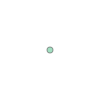

In [256]:
hotspot.geometry[0]

In [257]:
hotspot2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 310
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  308 non-null    int64  
 1   geometry    308 non-null    object 
 2   address     308 non-null    object 
 3   lokasi      308 non-null    object 
 4   coords      308 non-null    object 
 5   lon         308 non-null    float64
 6   lat         308 non-null    float64
 7   state       308 non-null    object 
 8   district    308 non-null    object 
 9   parlimen    308 non-null    object 
 10  dun         308 non-null    object 
 11  label       308 non-null    object 
 12  Lokasi      0 non-null      object 
dtypes: float64(2), int64(1), object(10)
memory usage: 33.7+ KB


In [258]:
result2.head()

,Unnamed: 0,geometry,address,lokasi,coords,lon,lat,state,district,parlimen,dun,label,Lokasi
0,0,POINT (100.32277 5.409320000000037),"Kampung Makam, George Town, Timur Laut, Pulau ...",Kampung Makam Haji Kassim,"100.32277, 5.409320000000037",100.322770,5.409320,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
1,1,POINT (100.3140300000001 5.404410000000041),"Kampung Dodol, George Town, Timur Laut, Pulau ...",Kampung Dodol,"100.3140300000001, 5.404410000000041",100.314030,5.404410,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
2,2,POINT (100.31539 5.406510000000026),Masjid Jamek Hashim Yahaya,Kampung Masjid Hashim Yahya,"100.31539, 5.406510000000026",100.315390,5.406510,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
3,3,POINT (100.3140734163665 5.409581694947581),"Jalan P. Ramlee, Taman Seri Kijang, George Tow...",Jalan P.Ramlee,"100.3140734163665, 5.409581694947581",100.314073,5.409582,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN
4,4,POINT (100.3147515070017 5.410768050340871),"Lilitan Stadium, George Town, Timur Laut, 1035...",Lilitan Stadium (Astaka Makan),"100.3147515070017, 5.410768050340871",100.314752,5.410768,Pulau Pinang,Timur Laut,P.050 Jelutong,N.29 Datok Keramat,hotspot,NaN


In [261]:
# This example uses heatmaps to visualize the density of volcanoes
# which is more in some parts of the world compared to others.

from folium import plugins

mapheat = fm.Map(location = [5.398948,100.430115], tiles='Cartodb dark_matter', zoom_start = 12)

hotspot = result2[result2['label'].isin(['hotspot'])]
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in hotspot.geometry ]

#heat_data
plugins.HeatMap(heat_data).add_to(mapheat)

pn.panel(mapheat, height=1200)

AttributeError: 'str' object has no attribute 'xy'

In [260]:
# Fairly obvious I imagine - works best with transparent backgrounds
#from folium.plugins import FloatImage
#url = ('https://www.ipsb.com.my/wp-content/uploads/2021/10/DOSM-MySUL-790x400.png')
#FloatImage(url, bottom=5, left=0).add_to(map)

## Marker Cluster Analysis

In [262]:
!pip install xyzservices -qq

In [263]:
import xyzservices.providers as xyz

In [264]:
#fm.TileLayer('Stamen Terrain').add_to(map)
#fm.TileLayer('Stamen Toner').add_to(map)
#fm.TileLayer('Stamen Water Color').add_to(map)
#fm.TileLayer('cartodbpositron').add_to(map)
#fm.TileLayer('cartodbdark_matter').add_to(map)
#folium.TileLayer('openstreetmap').add_to(my_map)


from folium import plugins

#map center, zoom and tiles
mapblock = fm.Map(location = [5.398948,100.430115], tiles='cartodbdark_matter', zoom_start = 12)

#data_url = (
 #   "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
#)
#us_states_url = f"{data_url}/us-states.json"
#map = folium.Map([43, -100], zoom_start=4)

#map geojson
fm.GeoJson(duns, name='DUN boundary').add_to(mapblock)

#add control layer selection
from folium.plugins import FastMarkerCluster
FastMarkerCluster(data=list(zip(hotspot['lat'].values, hotspot['lon'].values)),name='hotspot location').add_to(mapblock)
FastMarkerCluster(data=list(zip(pusat['lat'].values, pusat['lon'].values)),name='pusat pemindahan bencana').add_to(mapblock)

fm.LayerControl().add_to(mapblock)


pn.panel(mapblock, height=1200)

Folium(Map, height=1200)

In [241]:
app = pn.panel(mapblock, height=1200)
app.save('cluster.html', embed=True)

In [268]:
import panel as pn
pn.extension(sizing_mode="stretch_width", template="fast")
pn.state.template.param.update(title="Apps Banjir Penang - Marker Cluster Analysis")
pn.panel(mapblock, height=1200).show()

Launching server at http://localhost:49710


In [269]:
hotspot = pd.read_csv("hotspot_loc.csv")

In [270]:
hotspot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   geometry  311 non-null    object 
 1   address   311 non-null    object 
 2   lokasi    311 non-null    object 
 3   coords    311 non-null    object 
 4   lon       311 non-null    float64
 5   lat       311 non-null    float64
 6   state     311 non-null    object 
 7   district  311 non-null    object 
 8   parlimen  311 non-null    object 
 9   dun       311 non-null    object 
 10  label     311 non-null    object 
dtypes: float64(2), object(9)
memory usage: 26.9+ KB


In [271]:
from shapely import wkt
#df = pd.read_csv('myFile.csv')
hotspot['geometry'] = hotspot['geometry'].apply(wkt.loads)
hotspot = gpd.GeoDataFrame(hotspot, crs='epsg:4326')

## Combine Analysis 

In [272]:
import xyzservices.providers as xyz

from folium import plugins

combine = fm.Map(location = [5.398948,100.430115], tiles='cartodbdark_matter', zoom_start = 12)

#heat_data
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in hotspot.geometry ]
plugins.HeatMap(heat_data).add_to(combine)

def add_aqi_circles(combine, result):
    green_p1  = fm.map.FeatureGroup()
    #yellow_p1 = fm.map.FeatureGroup()
    #orange_p1 = fm.map.FeatureGroup()
    red_p1    = fm.map.FeatureGroup()
    purple_p1 = fm.map.FeatureGroup()
    #maroon_p1 = fm.map.FeatureGroup()

    for _, row in result.iterrows():
        if row.label == 'pusat pemindahan bencana':
            feature_group = green_p1
            fill_color = "green"
        elif row.label == 'kawasan banjir':
            feature_group = purple_p1
            fill_color = "purple"
        #elif row.label == 'pusat pemindahan bencana':
        #    feature_group = orange_p1
        #    fill_color = "orange"
        elif row.label == 'hotspot':
            feature_group = red_p1
            fill_color = "red"
        #elif row.AQI < 300:
        #    feature_group = purple_p1
        #    fill_color='purple'
        #else:
        #    feature_group = maroon_p1
        #    fill_color = "maroon"

        feature_group.add_child(
            fm.CircleMarker(
                [row.lat, row.lon],
                radius=5,
                fill=True,
                fill_color=fill_color,
                fill_opacity=0.7
            )
        )

    combine.add_child(green_p1, name='pusat')
    #map.add_child(yellow_p1)
    #map.add_child(orange_p1)
    combine.add_child(red_p1, name='hotspot')
    combine.add_child(purple_p1, name='kawasan')
    
    # Adds tool measure to the top right
    from folium.plugins import MeasureControl
    combine.add_child(MeasureControl())
    
    #map geojson
    #fm.GeoJson(duns, name='DUN boundary').add_to(combine)
    #fm.GeoJsonTooltip(['dun', 'parlimen']).add_to(combine.geojson)
    fm.GeoJson(duns, name='DUN boundary',tooltip=fm.GeoJsonTooltip(fields=['dun', 'parlimen'])).add_to(combine)

    fm.LayerControl().add_to(combine)
    

add_aqi_circles(combine, result)
pn.panel(combine, height=1200)


Folium(Map, height=1200)

In [273]:
combine = pn.panel(combine, height=1200)
combine.save('heatmap.html', embed=True)

In [121]:
import panel as pn
pn.extension(sizing_mode="stretch_width", template="fast")
pn.state.template.param.update(title="My Data App")
pn.panel(combine, height=1200).show()

Launching server at http://localhost:63602
